In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score

import sys
path_name = r"C:\Users\User\Mon Drive\HEC\DSB\ML II\ML2_Forest"
sys.path.append(path_name)

import utils
from sklearn.ensemble import RandomForestClassifier

In [5]:
df_test = pd.read_csv(path_name + r"\test-full.csv")
df_train = pd.read_csv(path_name + r"\train.csv")
# pour avoir cover type au début
df_train = df_train[[df_train.columns[-1]] + list(df_train.columns[0:-1])]

In [6]:
# If we want to remove the soils

df_test_ns = df_test.loc[:, "Id": "Wilderness_Area4"]
df_train_ns = df_train.loc[:, "Id": "Wilderness_Area4"]

In [7]:
df_train.shape, df_test.shape

((15120, 56), (581012, 55))

In [5]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### First train-test

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Si on met que la df en input
def RF_classif(df_train=df_train):
    
    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    
    # Separate features and target 
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    data_train, data_test, target_train, target_test = train_test_split(
        X_train, y_train, test_size = 0.2
    )

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

# Si test & train déjà définis
def RF_classif_train_test(data_train, target_train, data_test, target_test):

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

In [64]:
y_true, y_pred = RF_classif()
accuracy_score(y_true, y_pred) # bien meilleur score que sur Kags

0.9388227513227513

In [66]:
print(classification_report(y_true, y_pred))

# On prédit moins bien 1 et 2, ce qui est un problème pcq représentent une immense majorité du dataset final

              precision    recall  f1-score   support

           1       0.92      0.96      0.94       431
           2       0.94      0.82      0.88       426
           3       0.91      0.92      0.91       424
           4       0.93      0.97      0.95       410
           5       0.92      0.97      0.95       449
           6       0.95      0.94      0.94       421
           7       0.99      0.98      0.99       463

    accuracy                           0.94      3024
   macro avg       0.94      0.94      0.94      3024
weighted avg       0.94      0.94      0.94      3024



In [67]:
from lightgbm import LGBMClassifier

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = LGBMClassifier()
clf.fit(X_train, y_train)

# Creating a Test dataset
X_test = df_test

# Make predictions on the test dataset
y_pred = clf.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 15120, number of used features: 46
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


# Vizualisation

### Une TSNE

In [10]:
df_train_ns

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,3151,0,0,1,0
15116,514378,3455,37,5,841,92,939,220,229,146,362,0,1,0,0
15117,368425,3279,90,14,404,113,1513,240,218,105,1503,1,0,0,0
15118,537844,3589,357,9,418,52,1868,205,223,155,1657,0,1,0,0


In [11]:
from sklearn.manifold import TSNE

X_train_ns = df_train_ns
y_train_ns = df_train['Cover_Type']

In [12]:
tsne = TSNE(verbose=True, n_components=2)
tsne_repr = tsne.fit_transform(X_train_ns)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.036s...


[t-SNE] Computed neighbors for 15120 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sample 13000 / 15120
[t-SNE] Computed conditional probabilities for sample 14000 / 15120

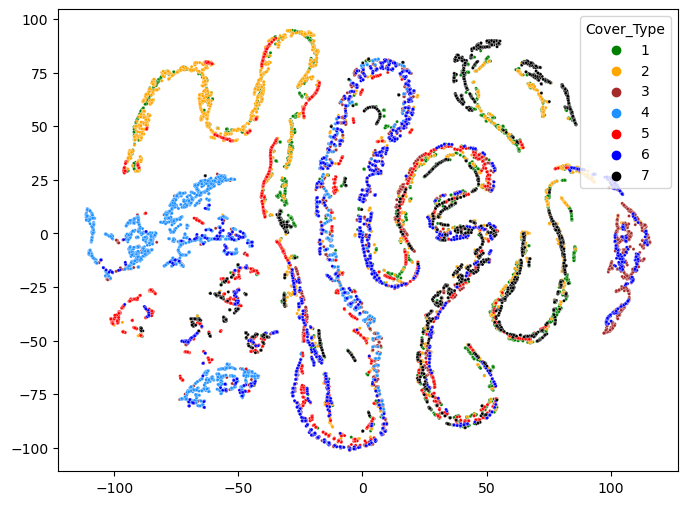

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_repr[:, 0], y=tsne_repr[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()

# PCA

### On df_train

In [8]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(df_train_ns)

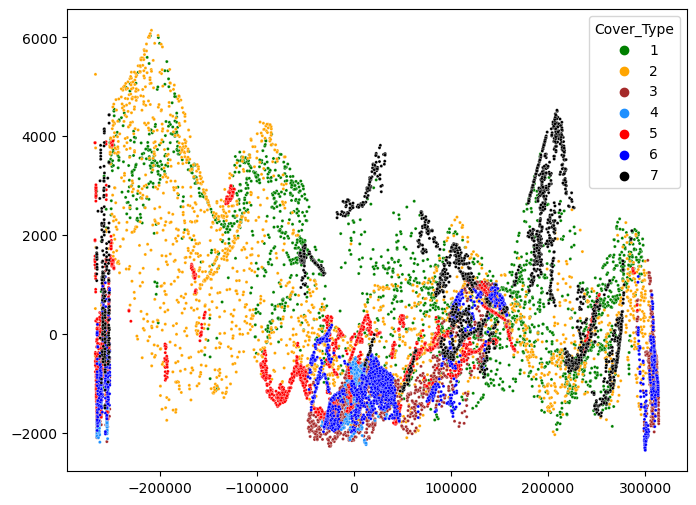

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=df_train["Cover_Type"],
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [10]:
pca.explained_variance_ratio_

array([9.99899594e-01, 7.27579503e-05])

In [11]:
# On voit que la projection sur une dimension explique 99.99% de la variance (??) ==> A ELUCIDER 

In [16]:
pca2 = PCA(n_components=1)
X_test_10D = pca.fit_transform(df_test)
pca.explained_variance_ratio_
# Pareil pour df_test !

array([0.99986747])

In [19]:
pca = PCA(n_components=1)
X_1D = pca.fit_transform(df_train_ns)
df_reduced = pd.DataFrame(np.stack([df_train["Cover_Type"], X_1D.ravel()]).T, columns=["Cover_Type", "1D"])

In [24]:
from utils import classif

y_true, y_pred = classif(df_reduced)
accuracy_score(y_true, y_pred) # on arrive à 67% d'accuracy avec une seule dimension !!!!!!

0.6815476190476191

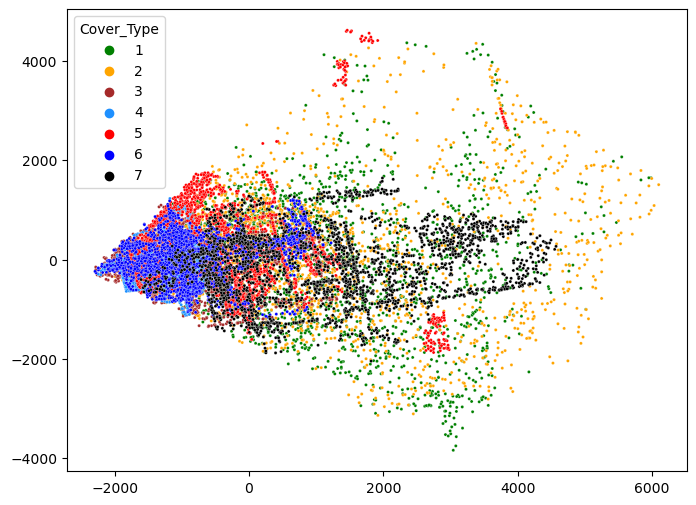

In [28]:
### Si on essaie les ID

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(df_train_ns.drop(columns='Id'))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=df_train["Cover_Type"],
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [29]:
pca.explained_variance_ratio_.sum() # Plus réaliste et déjà pas mal

0.9484606688511411

In [31]:
df_reduced = pd.DataFrame(np.c_[df_train["Cover_Type"], X_2D], columns=["Cover_Type", "1D", "2D"])
y_true, y_pred = classif(df_reduced)
accuracy_score(y_true, y_pred)

0.41964285714285715

In [32]:
# bizarre parce que semble largement déterminé par la scale des features
# (expliqué à 99% pcq échelle des indices de loin supérieure mais ne change rien quand on scale - heureusement pcq pca censée déjà scaler)

### Plotting df_test

<Axes: >

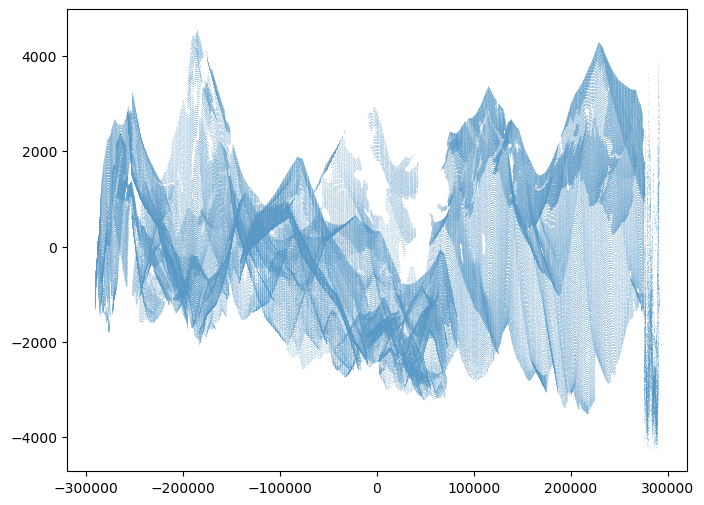

In [124]:
pca = PCA(n_components=2)
Xtest_2D = pca.fit_transform(df_test_ns)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1)

<Axes: >

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


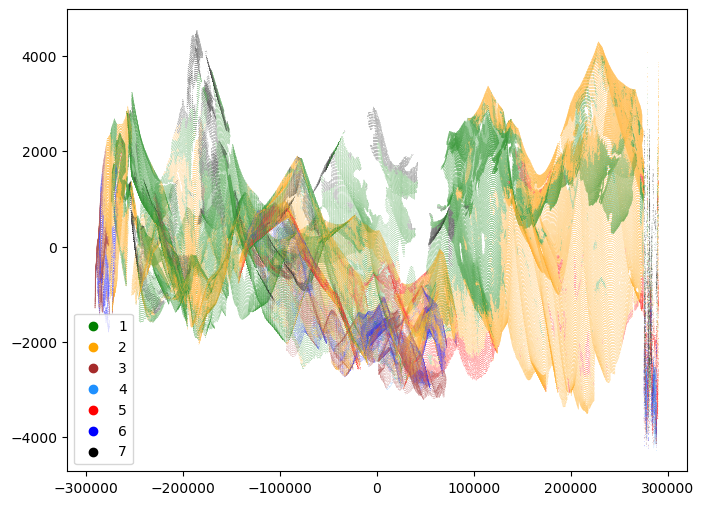

In [127]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1, hue=y_pred,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'])

<Axes: >

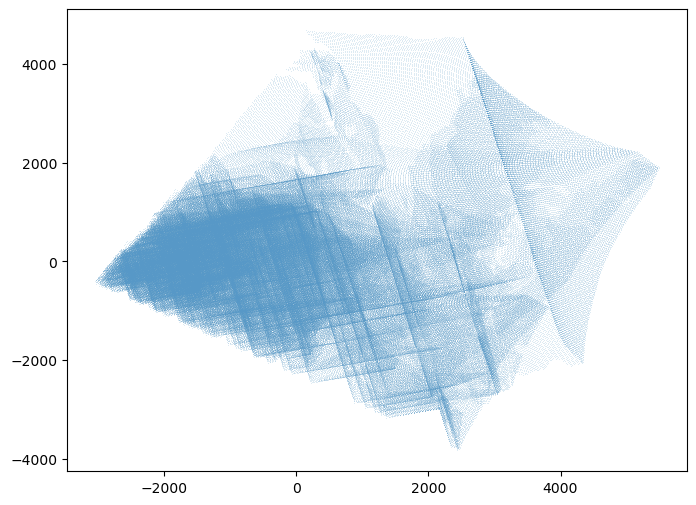

In [34]:
# Et sans les IDs

df_test_nsid = df_test_ns.drop(columns="Id")

pca = PCA(n_components=2)
Xtest_2D = pca.fit_transform(df_test_nsid)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1)

# Kmeans

In [25]:
# Si on part de df_train pour regarder les clusters sur df_test

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=5, init="k-means++")
y_pred = kmeans.fit_predict(df_train_ns)

In [27]:
pd.Series(y_pred).value_counts()

0    6791
1    4286
2    4043
dtype: int64

In [28]:
df_train_ns

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,3151,0,0,1,0
15116,514378,3455,37,5,841,92,939,220,229,146,362,0,1,0,0
15117,368425,3279,90,14,404,113,1513,240,218,105,1503,1,0,0,0
15118,537844,3589,357,9,418,52,1868,205,223,155,1657,0,1,0,0


In [29]:
pd.Series(kmeans.predict((df_test_ns))).value_counts()

0    229506
2    194419
1    157087
dtype: int64

In [30]:
kmeans.transform(df_test_ns.iloc[0:3])

array([[282008.23857878,  32544.46989751, 491246.89571431],
       [282006.70549159,  32541.34894524, 491245.78019775],
       [282007.28266546,  32516.15172914, 491242.57054947]])

### Best number of clusters

In [31]:
# En comparant si on part de df_train et df_test

In [32]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_ns)
    inertias.append(kmeans.inertia_)

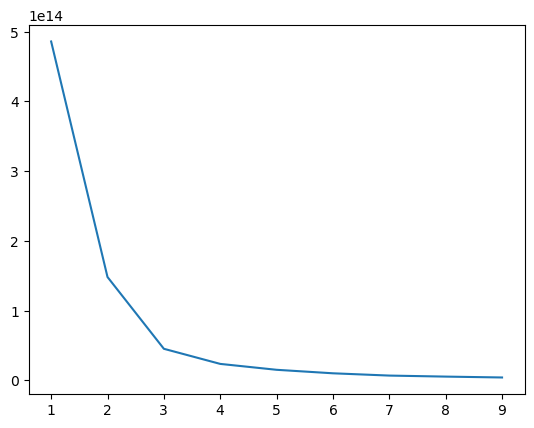

In [33]:
plt.plot(range(1, 10), inertias)

In [34]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_test_ns)
    inertias.append(kmeans.inertia_)

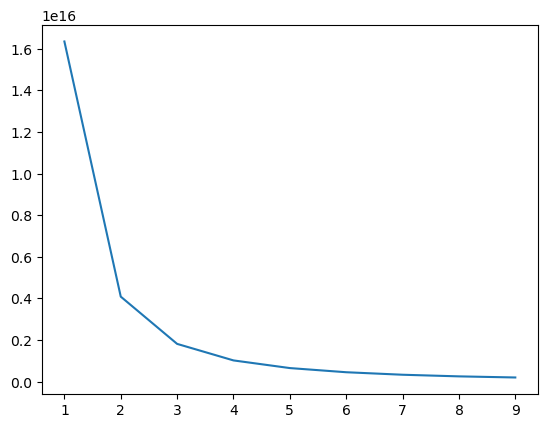

In [35]:
plt.plot(range(1,10), inertias)

In [36]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_ns)
    ss.append(silhouette_score(df_train_ns, kmeans.labels_))

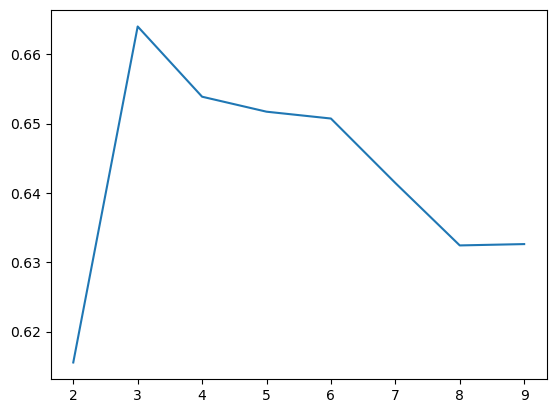

In [37]:
plt.plot(range(2, 10), ss)

2
3
4
5
6
7
8
9


C:\Users\User\AppData\Local\Temp\ipykernel_27176\3062962871.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)


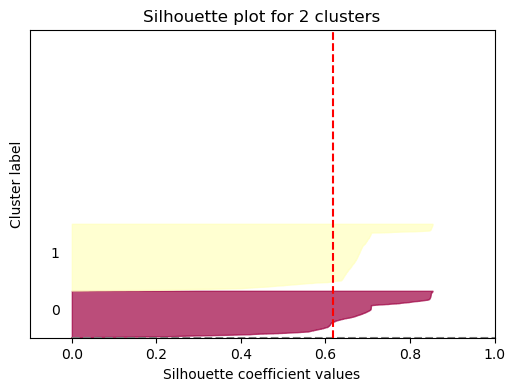

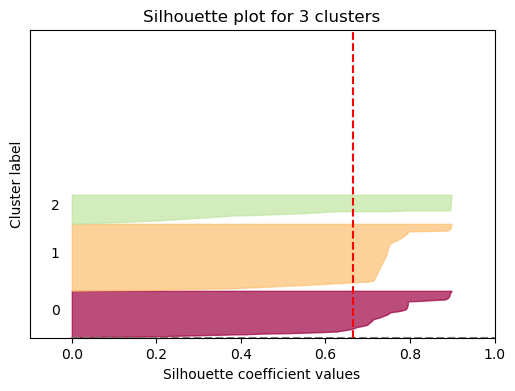

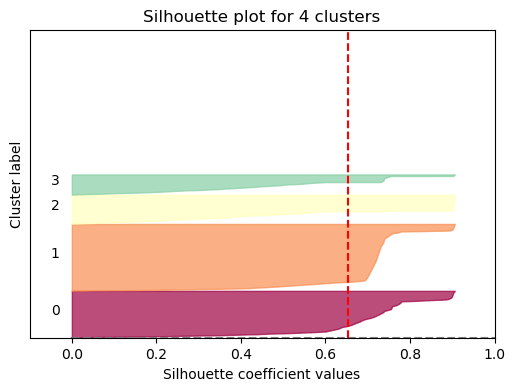

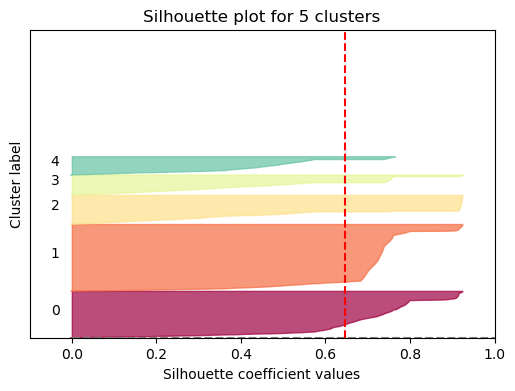

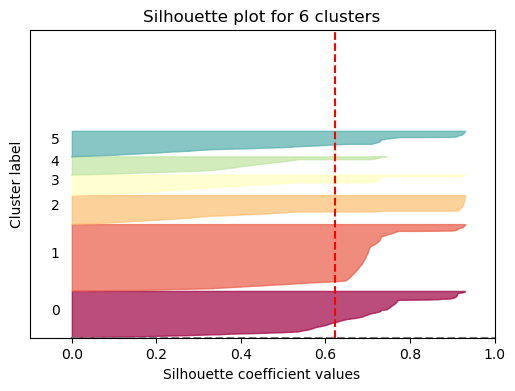

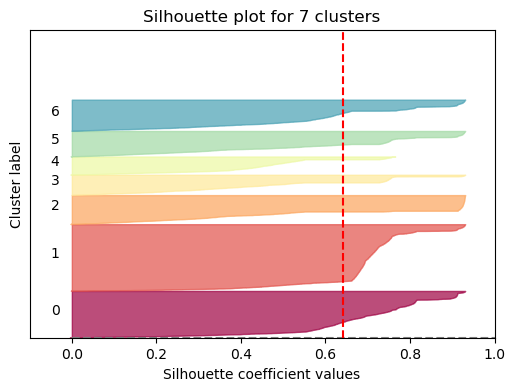

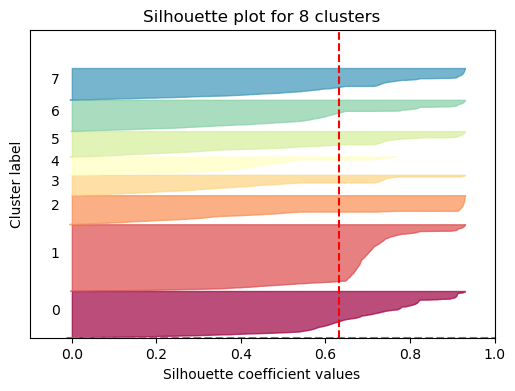

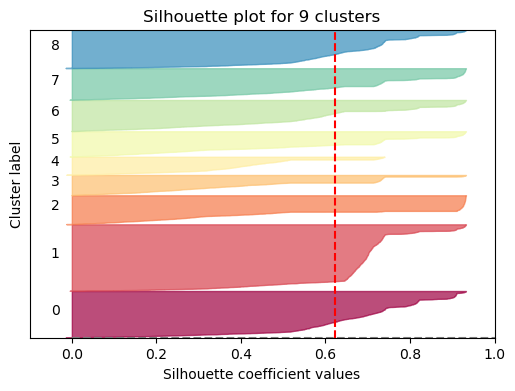

In [38]:
from sklearn.metrics import silhouette_samples

X = df_train_ns
range_n_clusters = range(2, 10)
silhouette_scores = []
sample_silhouette_values = []

for n_clusters in range_n_clusters:
    # Initialize and fit KMeans clustering algorithm
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette values for each sample
    sample_silhouette_values.append(silhouette_samples(X, cluster_labels))

for i, n_clusters in enumerate(range_n_clusters):
    plt.figure(figsize=(6, 4))
    plt.plot([0, 1], [i, i], '--', color='gray')  # Plot silhouette score reference line
    plt.yticks([])  # Clear the y-axis labels
    plt.xlim([-0.1, 1])  # Set the x-axis limits
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])  # Set the y-axis limits
    
    silhouette_values = sample_silhouette_values[i]
    silhouette_values.sort()
    
    y_lower = 10
    for j in range(n_clusters):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10
    
    plt.title("Silhouette plot for {} clusters".format(n_clusters))
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")  # Plot average silhouette score
    plt.show()

### Same clusters if we do it on test or train?

In [39]:
km_train = KMeans(n_clusters=3, n_init=10, init="k-means++")
km_train.fit_predict(df_train_ns)
c1 = km_train.cluster_centers_

km_test = KMeans(n_clusters=3, n_init=10, init="k-means++")
km_test.fit_predict(df_test_ns)
c2 =km_test.cluster_centers_

In [40]:
norms = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        norms[i, j] = np.linalg.norm(c1[i] - c2[j])
        
norms / 1000

#### Seems to be giving relatively similar results

array([[199.57845043, 393.69217435,   6.35028169],
       [259.18729803,  65.10237096, 452.4161961 ],
       [  9.58892538, 184.54803382, 202.80881266]])

In [41]:
# If we do it on the full ds, what's the labels distribution on train
# On dirait que clusterise bien pareil même si on entraine 
pd.Series(km_test.predict(df_train_ns)).value_counts()

0    6375
1    4740
2    4005
dtype: int64

In [64]:
df_test["kmean_cluster"] = km_test.labels_
df_train["kmean_cluster"] = km_test.predict(df_train_ns)

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

data_train, data_test, target_train, target_test = train_test_split(
    X_train, y_train, test_size = 0.2)

cat_col = ["kmean_cluster"]
cols = df_train.drop(columns=["Cover_Type", 'kmean_cluster']).columns

preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_col),
        ("others", "passthrough", cols),
    ])

clf = RandomForestClassifier(n_estimators=150)
pipe = make_pipeline(preprocessor, clf)

pipe.fit(data_train, target_train)

y_pred = pipe.predict(data_test)

In [66]:
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.78      0.79       451
           2       0.80      0.69      0.74       420
           3       0.87      0.86      0.86       414
           4       0.94      0.98      0.96       491
           5       0.89      0.98      0.93       408
           6       0.87      0.86      0.86       417
           7       0.94      0.97      0.95       423

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [67]:
from utils import IWCV
IWCV(df_train=df_train, predictor=pipe, k_valid=20)

(0.806434968988599,
 array([0.81803431, 0.74840623, 0.8699146 , 0.9733959 , 0.96379196,
        0.87522431, 0.97855561]))

In [ ]:
### Testons différents clusters et l'impact: 
# amélioration globale légère mais à part ça dur de dire lequel est censé être mieux
# normal puisque nos cibles ont ici des tailles incroyablement différentes

# 6 semble ici être le meilleur mais bon

In [ ]:
# 3 (0.7964317147617246, array([0.80137661, 0.74018367, 0.86667338, 0.97626767, 0.95692951,
#        0.88469327, 0.97633215]))
# 4 (0.8063791783292583, array([0.81147599, 0.7509015 , 0.87668574, 0.97692516, 0.9623179 ,
#        0.89499291, 0.98215092]))
# 5 (0.7973268895390577, array([0.80508998, 0.73625063, 0.87534417, 0.97047013, 0.97040958,
#        0.88565691, 0.98133588]))
# 6 (0.8138732156589155, array([0.82406566, 0.7590603 , 0.87264768, 0.97611052, 0.96225996,
#        0.88922548, 0.9750562 ]))
# 7 (0.8025745240127359, array([0.81797665, 0.73892822, 0.87166264, 0.97420566, 0.95712525,
#        0.88150201, 0.98244342]))
# 8 (0.8059379238503376, array([0.81540698, 0.74684563, 0.87582675, 0.96810505, 0.97035152,
#        0.88794631, 0.98142766]))
# 9 (0.8138747765220707, array([0.80690948, 0.77089976, 0.88889744, 0.97303765, 0.9627102 ,
#        0.89193328, 0.97890003]))
# 10 (0.8046872549494163, array([0.81832363, 0.74217926, 0.87083945, 0.97714715, 0.96876801,
#        0.89176928, 0.97797113]))
# 11 (0.8101769386975759, array([0.82034927, 0.75321916, 0.87373846, 0.9793508 , 0.96630527,
#        0.87908902, 0.98414675]))

# 3 (0.8091096600808318, array([0.81079015, 0.75869236, 0.88729933, 0.97445768, 0.95445724,
#        0.87974177, 0.97790399]))
# 4 (0.8043271518888415, array([0.80477863, 0.75080844, 0.88753435, 0.97432924, 0.96106419,
#        0.88896709, 0.98504902]))
# 5 (0.8085925468936838, array([0.8117079 , 0.75697941, 0.87493372, 0.97626658, 0.96696487,
#        0.88544683, 0.97756879]))
# 6 (0.8133828296403914, array([0.82732881, 0.75311597, 0.88433786, 0.97279678, 0.9596562 ,
#        0.89336551, 0.97762147]))
# 7 (0.8091068135960581, array([0.8014788 , 0.76791348, 0.86982589, 0.97626454, 0.9569986 ,
#        0.88568719, 0.98246762]))
# 8 (0.8041301715932397, array([0.81805564, 0.73995522, 0.88289342, 0.97306012, 0.96713386,
#        0.88568317, 0.98005667]))
# 9 (0.8066946762534507, array([0.80211876, 0.76039546, 0.86924134, 0.96934032, 0.96188595,
#        0.8987365 , 0.98352502]))
# 10 (0.8143313394097335, array([0.82199016, 0.76137033, 0.87446658, 0.97673993, 0.95933104,
#        0.88960218, 0.97938239]))
# 11 (0.8045071041145079, array([0.81653566, 0.74225301, 0.87598252, 0.9680956 , 0.96338752,
#        0.89302712, 0.98549733]))

# 6 (0.8148632825506185, array([0.82059708, 0.76388664, 0.88091409, 0.97495579, 0.95835447,
#        0.88032613, 0.97857982]))



# DB Scan

In [35]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1000, min_samples=400, n_jobs=-1)
dbscan.fit(df_test_ns)

DBSCAN(eps=1000, min_samples=400, n_jobs=-1)

In [36]:
pd.Series(dbscan.labels_).value_counts()

 11    306137
-1     188353
 10     32902
 8      14243
 3       7557
 0       7235
 2       6102
 4       4541
 6       4369
 1       3897
 9       3385
 7        772
 5        746
 12       412
 13       361
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16992\1731994135.py:6: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1, hue=dbscan.labels_,


<Axes: >

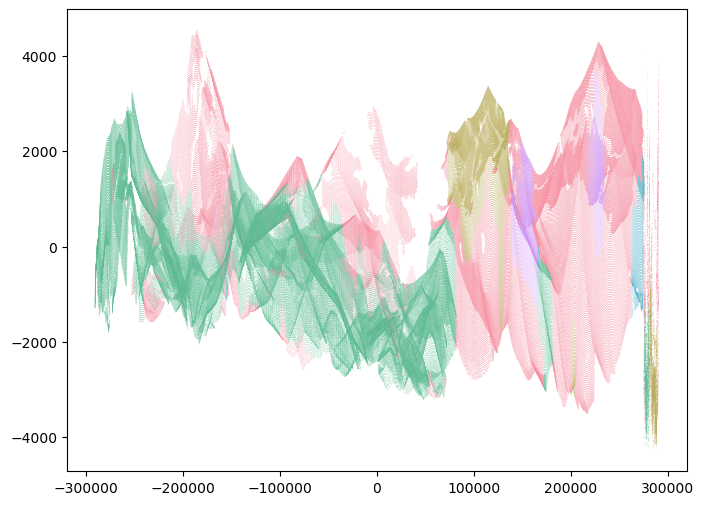

In [9]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
Xtest_2D = pca.fit_transform(df_test_ns)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1, hue=dbscan.labels_,
                palette=sns.color_palette("husl", 5),
                legend=False)

In [10]:
df_test["DBScan"] = dbscan.labels_
df_train["DBScan"] = list(df_test[df_test["Id"].isin(df_train["Id"])]["DBScan"])

In [11]:
df_train["DBScan"].value_counts()

 11    8655
-1     3022
 0     1942
 1      747
 10     299
 8      137
 2       99
 3       86
 4       49
 6       48
 9       23
 5        5
 13       5
 7        3
Name: DBScan, dtype: int64

In [12]:
vc = pd.DataFrame(df_train["DBScan"].value_counts())
too_small = list(vc[vc["DBScan"] < 30].index)
df_test.loc[df_test["DBScan"].isin(too_small), "DBScan"] = -1
df_train.loc[df_train["DBScan"].isin(too_small), "DBScan"] = -1

In [13]:
pd.DataFrame(df_train["DBScan"].value_counts())

,DBScan
11,8655
-1,3058
0,1942
1,747
10,299
8,137
2,99
3,86
4,49
6,48


In [14]:
pd.DataFrame(df_train[["DBScan", "Cover_Type"]].value_counts()).sort_index()

0
DBScan Cover_Type      
-1     1            138
       2           1035
       3            507
       4            188
       5            274
       6            703
       7            213
 0     1           1942
 1     1             80
       2            667
 2     2             99
 3     2             86
 4     2             49
 6     2             48
 8     2            137
 10    2             39
       3            260
 11    3           1393
       4           1972
       5           1886
       6           1457
       7           1947

In [15]:
from lightgbm import LGBMClassifier
from utils import IWCV
IWCV(df_train=df_train, predictor=LGBMClassifier(max_depth=10), k_valid=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 13608, number of used features: 46
[LightGBM] [Info] Start training from score -1.944368
[LightGBM] [Info] Start training from score -1.943341
[LightGBM] [Info] Start training from score -1.950551
[LightGBM] [Info] Start training from score -1.943341
[LightGBM] [Info] Start training from score -1.943855
[LightGBM] [Info] Start training from score -1.937203
[LightGBM] [Info] Start training from score -1.958854
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set 

(0.9356909572549782,
 array([0.92526883, 0.9451103 , 0.88792668, 0.97810519, 0.96196717,
        0.9052216 , 0.99483273]))

In [16]:
from utils import clean_predictor

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = LGBMClassifier(max_depth=10)
clf.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(df_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})
predictions_df = clean_predictor(y_pred)

predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 15120, number of used features: 46
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set 

In [17]:
predictions_df["Cover_Type"].value_counts()

2    222418
5    133981
7    120184
3     42359
6     31729
1     26613
4      3728
Name: Cover_Type, dtype: int64

<Axes: >

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


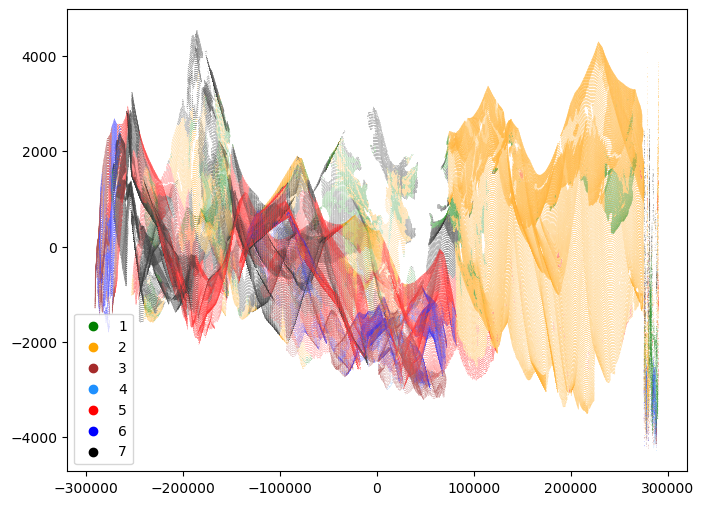

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1, hue=y_pred,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'])

In [75]:
soil_types = [f"Soil_Type{i}" for i in range(1, 41)]
wilderness_areas = [f"Wilderness_Area{i}" for i in range(1,5)]
df_test["Wilderness_Area_Synth"] = df_test[wilderness_areas] @ range(1,5)
df_train["Wilderness_Area_Synth"] = df_train[wilderness_areas] @ range(1,5)
df_test["Soil_Type_Synth"] = df_test[soil_types] @ range(1,41)
df_train["Soil_Type_Synth"] = df_train[soil_types] @ range(1,41)
df_train = df_train.drop(columns=wilderness_areas + soil_types)
df_test = df_test.drop(columns=wilderness_areas + soil_types)

### Without ID

In [63]:
df_test_nsid = df_test_ns.drop(columns="Id")

dbscan = DBSCAN(eps=200, min_samples=200, n_jobs=-1)
dbscan.fit(df_test_nsid)

DBSCAN(eps=200, min_samples=200, n_jobs=-1)

In [64]:
pd.Series(dbscan.labels_).value_counts()

 5     453939
-1     105184
 2      10125
 1       5624
 8        969
 12       785
 4        706
 11       533
 6        520
 3        437
 15       347
 10       327
 9        307
 13       304
 7        281
 0        255
 16       202
 14       167
dtype: int64

<Axes: >

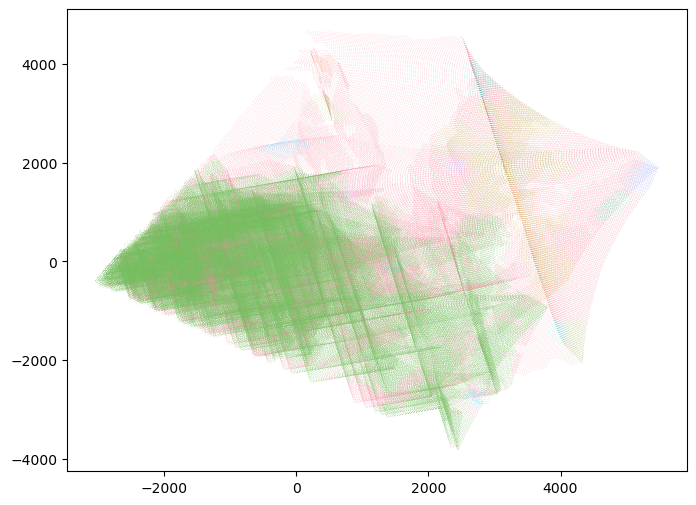

In [65]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
Xtest_2D = pca.fit_transform(df_test_nsid)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xtest_2D[:, 0], y=Xtest_2D[:, 1], s=0.1, hue=dbscan.labels_,
                palette=sns.color_palette("husl", len(pd.Series(dbscan.labels_).value_counts())),
                legend=False)

In [66]:
df_test["DBScan"] = dbscan.labels_
df_train["DBScan"] = list(df_test[df_test["Id"].isin(df_train["Id"])]["DBScan"])

In [68]:
from lightgbm import LGBMClassifier
from utils import IWCV
IWCV(df_train=df_train, predictor=LGBMClassifier(), k_valid=10)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 13608, number of used features: 46
[LightGBM] [Info] Start training from score -1.941803
[LightGBM] [Info] Start training from score -1.947455
[LightGBM] [Info] Start training from score -1.938734
[LightGBM] [Info] Start training from score -1.949001
[LightGBM] [Info] Start training from score -1.939245
[LightGBM] [Info] Start training from score -1.952620
[LightGBM] [Info] Start training from score -1.952620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 13608, number of used features: 46
[LightGBM] [Info] Start training from score 

(0.8144020618263375,
 array([0.8180665 , 0.7642792 , 0.87538281, 0.9693452 , 0.96051001,
        0.89474577, 0.9800611 ]))

In [69]:
from utils import clean_predictor

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = LGBMClassifier(max_depth=10)
clf.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(df_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})
predictions_df = clean_predictor(y_pred)

predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 15120, number of used features: 46
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set 

#### marche pas pour l'instant, essayer en scalant et visualiser d'autres manières

### Optics

In [45]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=100, n_jobs=-1)
optics.fit(df_train_ns)

KeyboardInterrupt: 

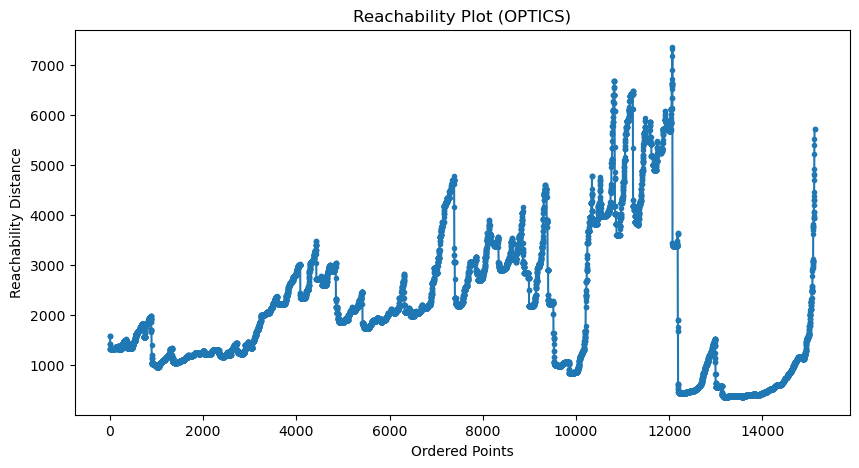

In [143]:
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(reachability)), reachability, marker='.')
plt.title('Reachability Plot (OPTICS)')
plt.xlabel('Ordered Points')
plt.ylabel('Reachability Distance')
plt.show()

In [130]:
pd.Series(optics.labels_).value_counts()

-1    11185
 3     2908
 2      696
 0      181
 1      150
dtype: int64

In [ ]:
from sklearn.cluster import HDBSCAN
hdbscan = HDBSCAN()